# ANÁLISIS E INSIGHTS

## SET UP

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Automcompletar rápido
%config IPCompleter.greedy=True

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

#Formato de graficos
sns.set_style('darkgrid')

## CARGA DE DATOS

In [21]:
df = pd.read_pickle('../Datos/df.pickle')
df.head()

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00


In [22]:
df_dia = pd.read_pickle('../Datos/df_dia.pickle')
df_dia.head()

,planta,inverter_id,irradiacion_min,irradiacion_mean,irradiacion_max,t_ambiente_min,t_ambiente_mean,t_ambiente_max,t_modulo_min,t_modulo_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,eficiencia_min,eficiencia_mean,eficiencia_max,kw_dia_max,kw_total_max
fecha,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00


## ANÁLISIS E INSIGHTS

La primera palanca es la recepción de la energía solar.

Existen 3 KPIs con los que medir esta palanca: irradiación incidente, temperatura ambiente y temperatura del módulo.

Estos KPIs se miden con un único sensor por planta, así que el dato es el mismo para todos los inverters.

Dado que da igual el inverter y solo se precisa de esas 3 variables se creará un dataset más pequeño con solo un inverter de cada planta para trabajar sobre el.

In [23]:
recepcion = df.loc[(df.inverter_id == '1BY6WEcLGh8j5v7') | (df.inverter_id == 'q49J1IKaHRwDQnt'), 'planta':'t_modulo']
recepcion

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo
fecha,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86
2020-05-15 00:15:00,p1,5,15,0,15,HmiyD2TTLFNqkNe,0.00,25.08,22.76
2020-05-15 00:30:00,p1,5,15,0,30,HmiyD2TTLFNqkNe,0.00,24.94,22.59
2020-05-15 00:45:00,p1,5,15,0,45,HmiyD2TTLFNqkNe,0.00,24.85,22.36
2020-05-15 01:00:00,p1,5,15,1,0,HmiyD2TTLFNqkNe,0.00,24.62,22.17
...,...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,p2,6,17,22,45,iq8k7ZNt4Mwm3w0,0.00,23.51,22.86
2020-06-17 23:00:00,p2,6,17,23,0,iq8k7ZNt4Mwm3w0,0.00,23.48,22.74
2020-06-17 23:15:00,p2,6,17,23,15,iq8k7ZNt4Mwm3w0,0.00,23.35,22.49


### ¿Las dos plantas reciben la misma cantidad de energía solar?

In [24]:
temp = recepcion.groupby('planta').agg({'irradiacion':sum,'t_ambiente':np.mean,'t_modulo':np.mean})
temp

,irradiacion,t_ambiente,t_modulo
planta,,,
p1,726.40,25.56,31.18
p2,758.49,28.07,32.77


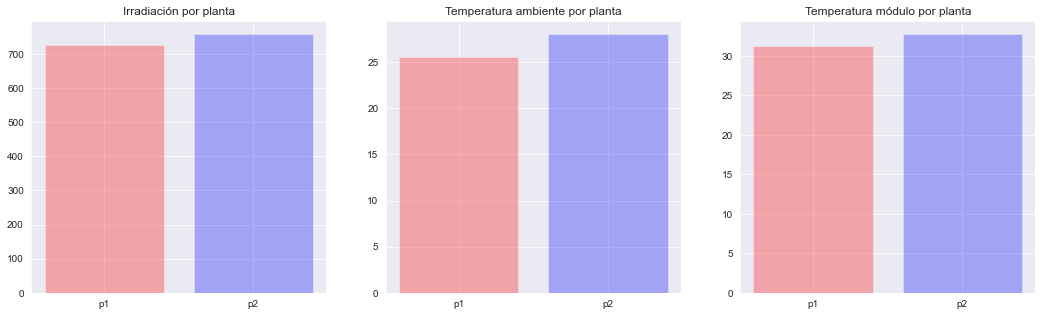

In [25]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,5))

ax[0].bar(temp.index, temp.irradiacion, color = ['red','blue'], alpha = 0.3)
ax[1].bar(temp.index, temp.t_ambiente, color = ['red','blue'], alpha = 0.3)
ax[2].bar(temp.index, temp.t_modulo, color = ['red','blue'], alpha = 0.3)
ax[0].set_title('Irradiación por planta')
ax[1].set_title('Temperatura ambiente por planta')
ax[2].set_title('Temperatura módulo por planta');

Conclusiones:

* En general la planta 2 recibe más energía solar que la 1.
* Pero esta diferencia no es lo suficientemente significativa como para explicar el problema de rendimiento que supuestamente existe.

### ¿Cómo se relacionan esas tres variables?

In [26]:
temp = recepcion.loc[:,['planta','irradiacion','t_ambiente','t_modulo']]
temp

,planta,irradiacion,t_ambiente,t_modulo
fecha,,,,
2020-05-15 00:00:00,p1,0.00,25.18,22.86
2020-05-15 00:15:00,p1,0.00,25.08,22.76
2020-05-15 00:30:00,p1,0.00,24.94,22.59
2020-05-15 00:45:00,p1,0.00,24.85,22.36
2020-05-15 01:00:00,p1,0.00,24.62,22.17
...,...,...,...,...
2020-06-17 22:45:00,p2,0.00,23.51,22.86
2020-06-17 23:00:00,p2,0.00,23.48,22.74
2020-06-17 23:15:00,p2,0.00,23.35,22.49


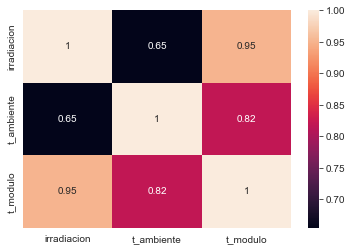

In [27]:
sns.heatmap(temp.corr(), annot=True);

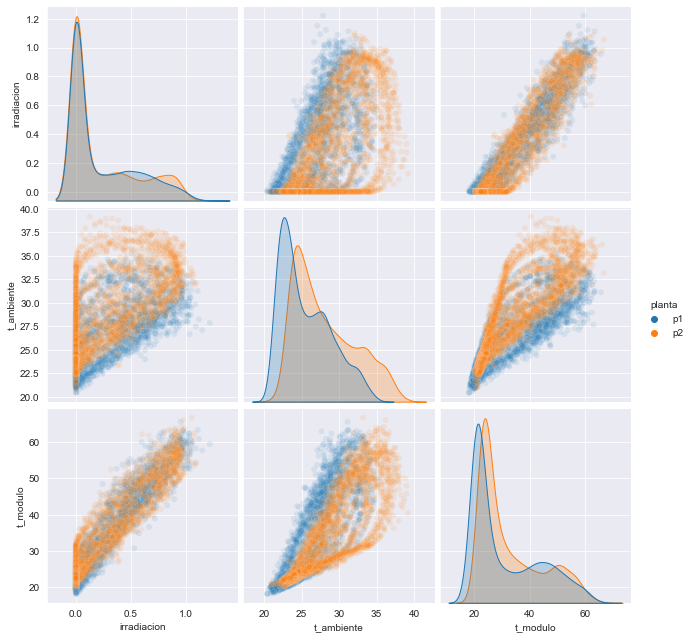

In [30]:
sns.pairplot(temp.reset_index(),hue='planta',height=3,plot_kws={'alpha':0.1});

Conclusiones:

* La irradiación correlaciona mucho con la temperatura del módulo.
* Pero no tanto con la temperatura ambiente.
* Por tanto una primera forma de identificar módulos defectuosos o sucios es localizar los que produzcan poco cuando la irradiación es alta.

### ¿Cómo se distribuye la irradiación y la temperatura a lo largo del día?

In [31]:
temp = pd.crosstab(recepcion.hora,recepcion.planta,values = recepcion.irradiacion,aggfunc='mean')
temp

planta,p1,p2
hora,,
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.04,0.04
7,0.19,0.19
8,0.37,0.39


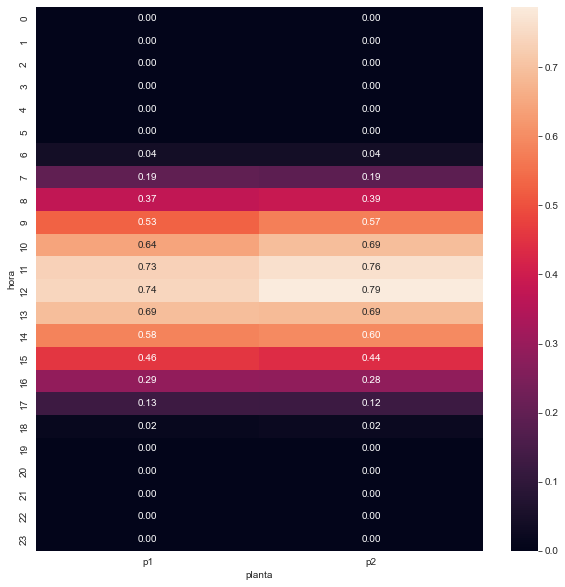

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f");

In [33]:
temp = pd.crosstab(recepcion.hora,recepcion.planta,values = recepcion.t_ambiente,aggfunc='mean')
temp

planta,p1,p2
hora,,
0,22.80,25.20
1,22.63,24.82
2,22.46,24.48
3,22.32,24.27
4,22.17,24.07
5,22.06,23.91
6,22.20,24.19
7,23.34,25.48
8,24.92,27.05


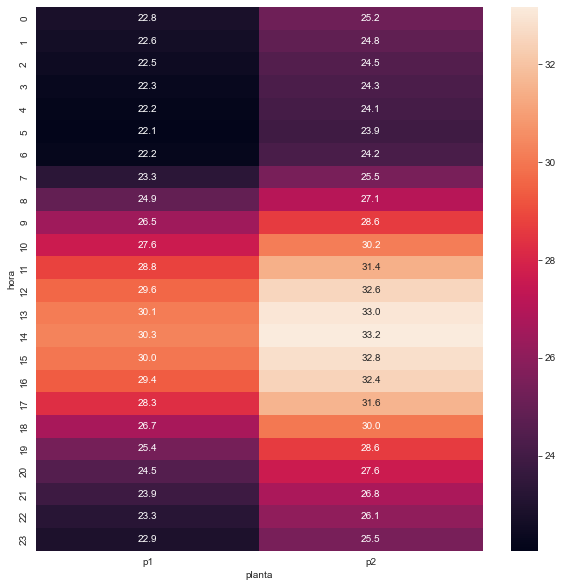

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".1f");

Conclusiones:

* Ambas plantas tienen patrones similares. Podría pensarse que están en zonas geográficas no muy alejadas.
* Existe irradiación (y por tanto a priori las plantas deberían producir) entre las 7 y las 17.
* La irradiación máxima se produce entre las 11 y las 12.
* La temperatura ambiente máxima se produce entre las 14 y las 16.

### ¿Ambas plantas son igual de capaces de generar DC a partir de la irradiación?

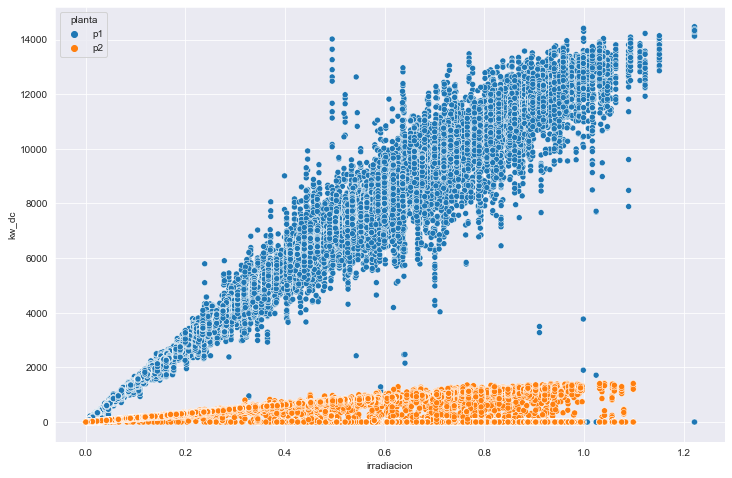

In [85]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df.irradiacion, y = df.kw_dc, hue = 'planta');

La planta número 2 produce muchos menos kw ante los mismos niveles de irradiación.

Pero antes se había detectado que la relación entre dc y ac en la planta 1 era extraña.

Y también que los datos de dc y ac no cuadraban con los de kw_dia.

Hay algo raro en los datos.

Se comprobará la relación entre la irradiación y kw_dia para ver si aporta información.

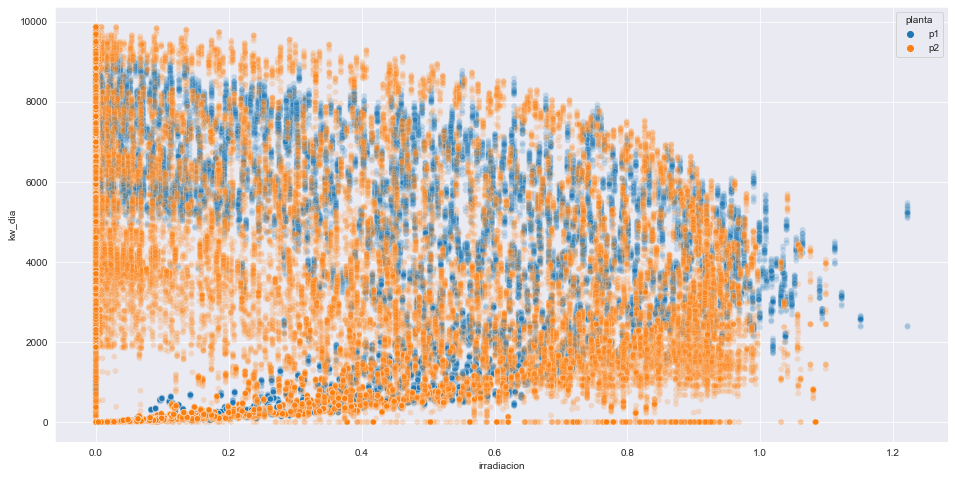

In [35]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df,x=df.irradiacion,y=df.kw_dia,hue=df.planta,alpha=0.2);

Resulta extraño. Parece que la relación es que a más irradiación menos kw generados. Lo cual no tiene sentido.

Incluso parece que los máximos de kw se producen en horas de irradiación cero.

NOTA: la variable kw_dia es un ACUMULADO. Eso significa que debería alcanzar su máximo cuando llega la última hora del día, por ej las 23:45, donde obviamente la irradiación es cero.

Y no tener datos hsta pasadas las 7 que es cuando vemos que hay irradiación.

Comprobación.

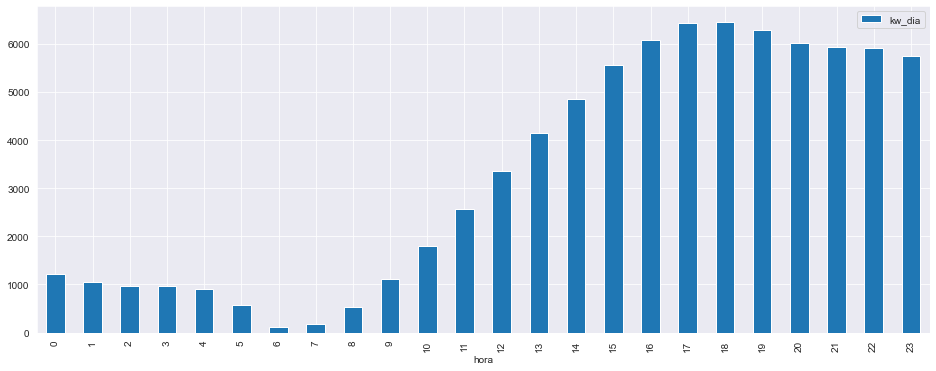

In [38]:
df.groupby('hora')[['kw_dia']].mean().plot.bar(figsize=(16,6));

De nuevo algo no cuadra. Hay generación entre las 00 y las 06.

Y además a partir de las 18 comienza a decaer, lo cual no debería pasar si es un acumulado.

Conclusión:

Las variables acumuladas como kw_dia y kw_total no parecen ser fiables. Sería conveniente contactar con responsables de la compañía para clarificar esta situación.

Pero para poder continuar vamos a asumir que los datos de dc y ac son correctos. Y bajo esa asunción se obtendrán las conclusiones.

**INSIGHT #1**

La planta 2 genera niveles mucho más bajos de DC incluso a niveles similares de irradiación.

### ¿La generación es constante a lo largo de los días?

Gráfico de la visión global de generación de DC durante el período de análisis.

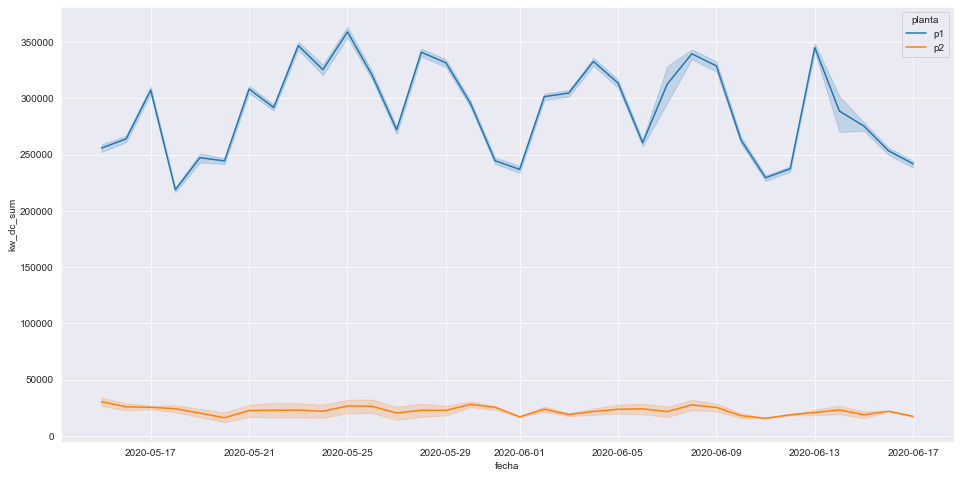

In [40]:
plt.figure(figsize = (16,8))
sns.lineplot(data = df_dia.reset_index(), x = df_dia.index, y = 'kw_dc_sum', hue = 'planta');

Se observa que la planta 1 tiene mucha más variabilidad mientras que la planta 2 es mucho más constante.

Sobre todo extraña los bajos niveles de generacion de DC en de la planta 2 en comparación con la 1.

Se examinará la generación de cada día para intentar detectar las causas.

Se generará una variable date para poder agregar por ella.

In [41]:
df['date'] = df.index.date
df

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total,date
fecha,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00,2020-06-17
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00,2020-06-17
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00,2020-06-17


Dataframe temporal para analizar la generación de DC horaria en cada día en la planta 1.

In [42]:
dc_constante_p1 = df[df.planta == 'p1'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p1

planta  date        hora
p1      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 796, dtype: float64

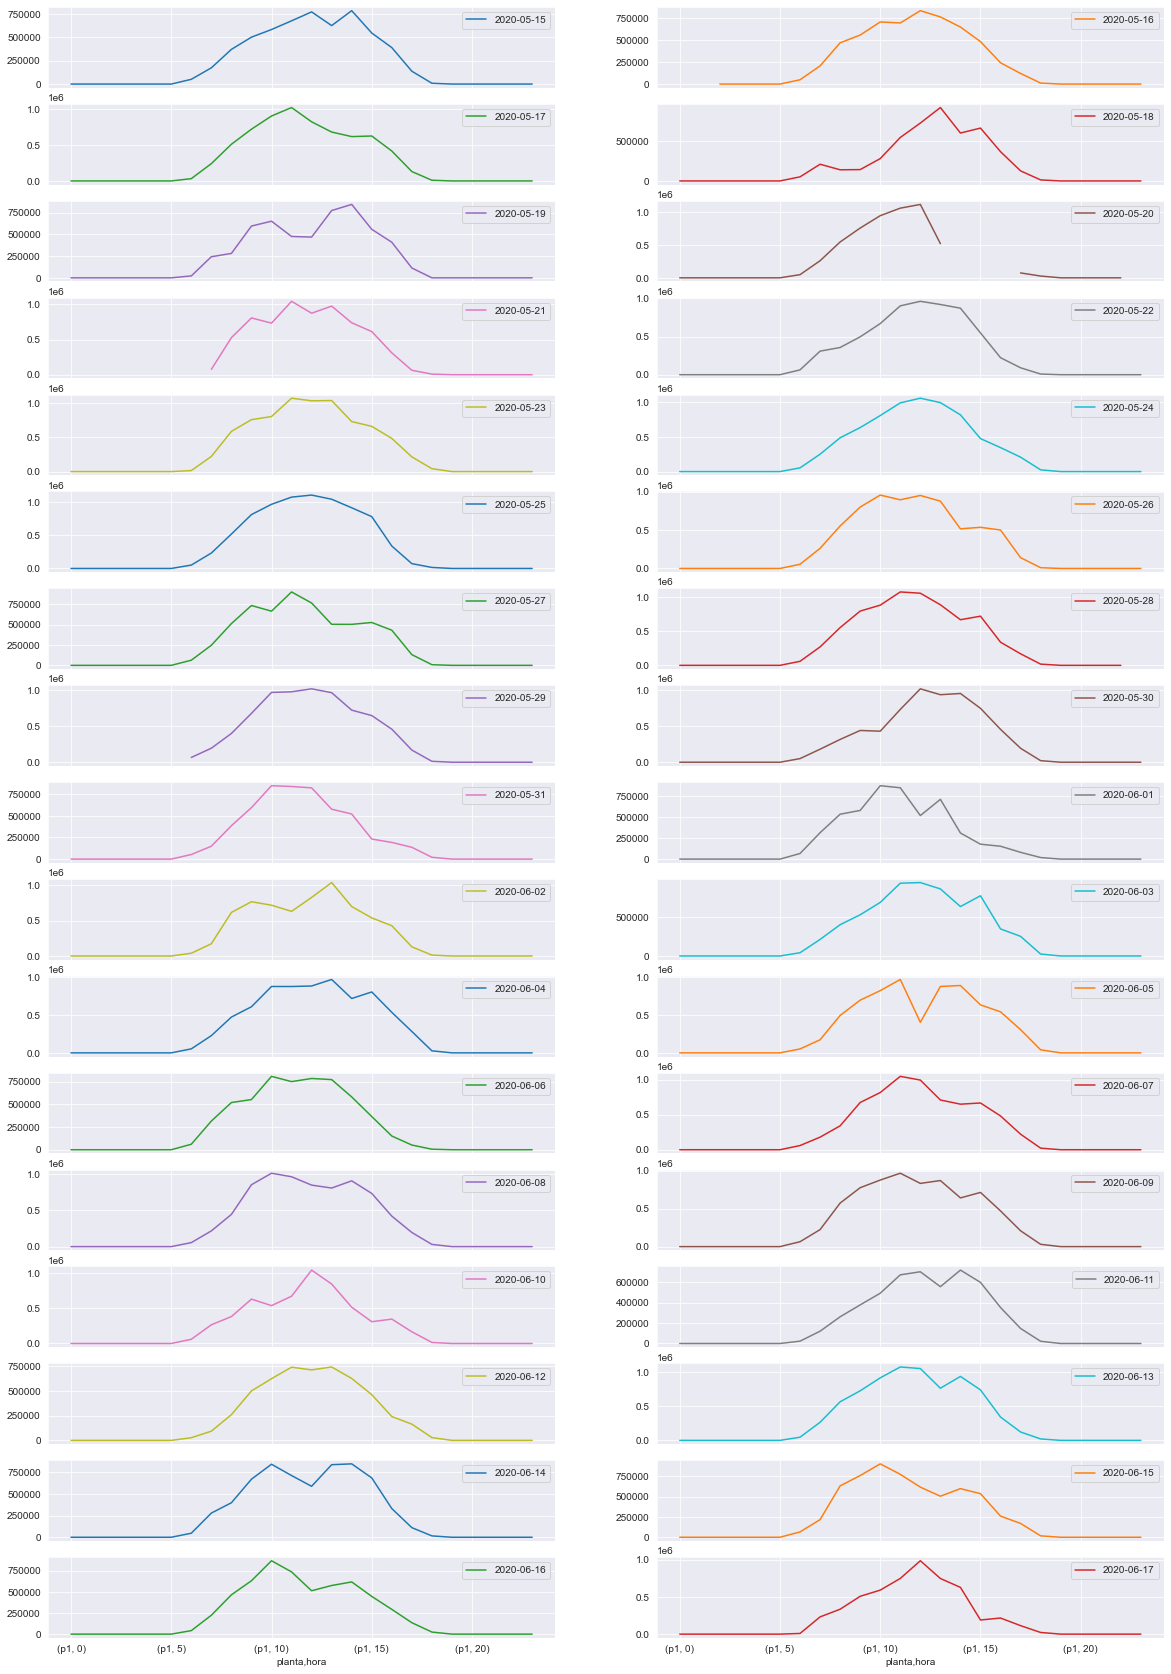

In [43]:
dc_constante_p1.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusiones:

* En la planta 1 sí se mantienen unos patrones similares durante todos los días.
* A excepción de un parón el día 20 de Mayo y una caída extraña el 05 de Junio.
* Pero ninguna parece ser estructural.
* Por tanto aunque cada día pudiera tener diferentes totales de producción los patrones intradía son similares y parecen correctos.

Mismo análisis para la planta 2

In [44]:
dc_constante_p2 = df[df.planta == 'p2'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p2

planta  date        hora
p2      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 816, dtype: float64

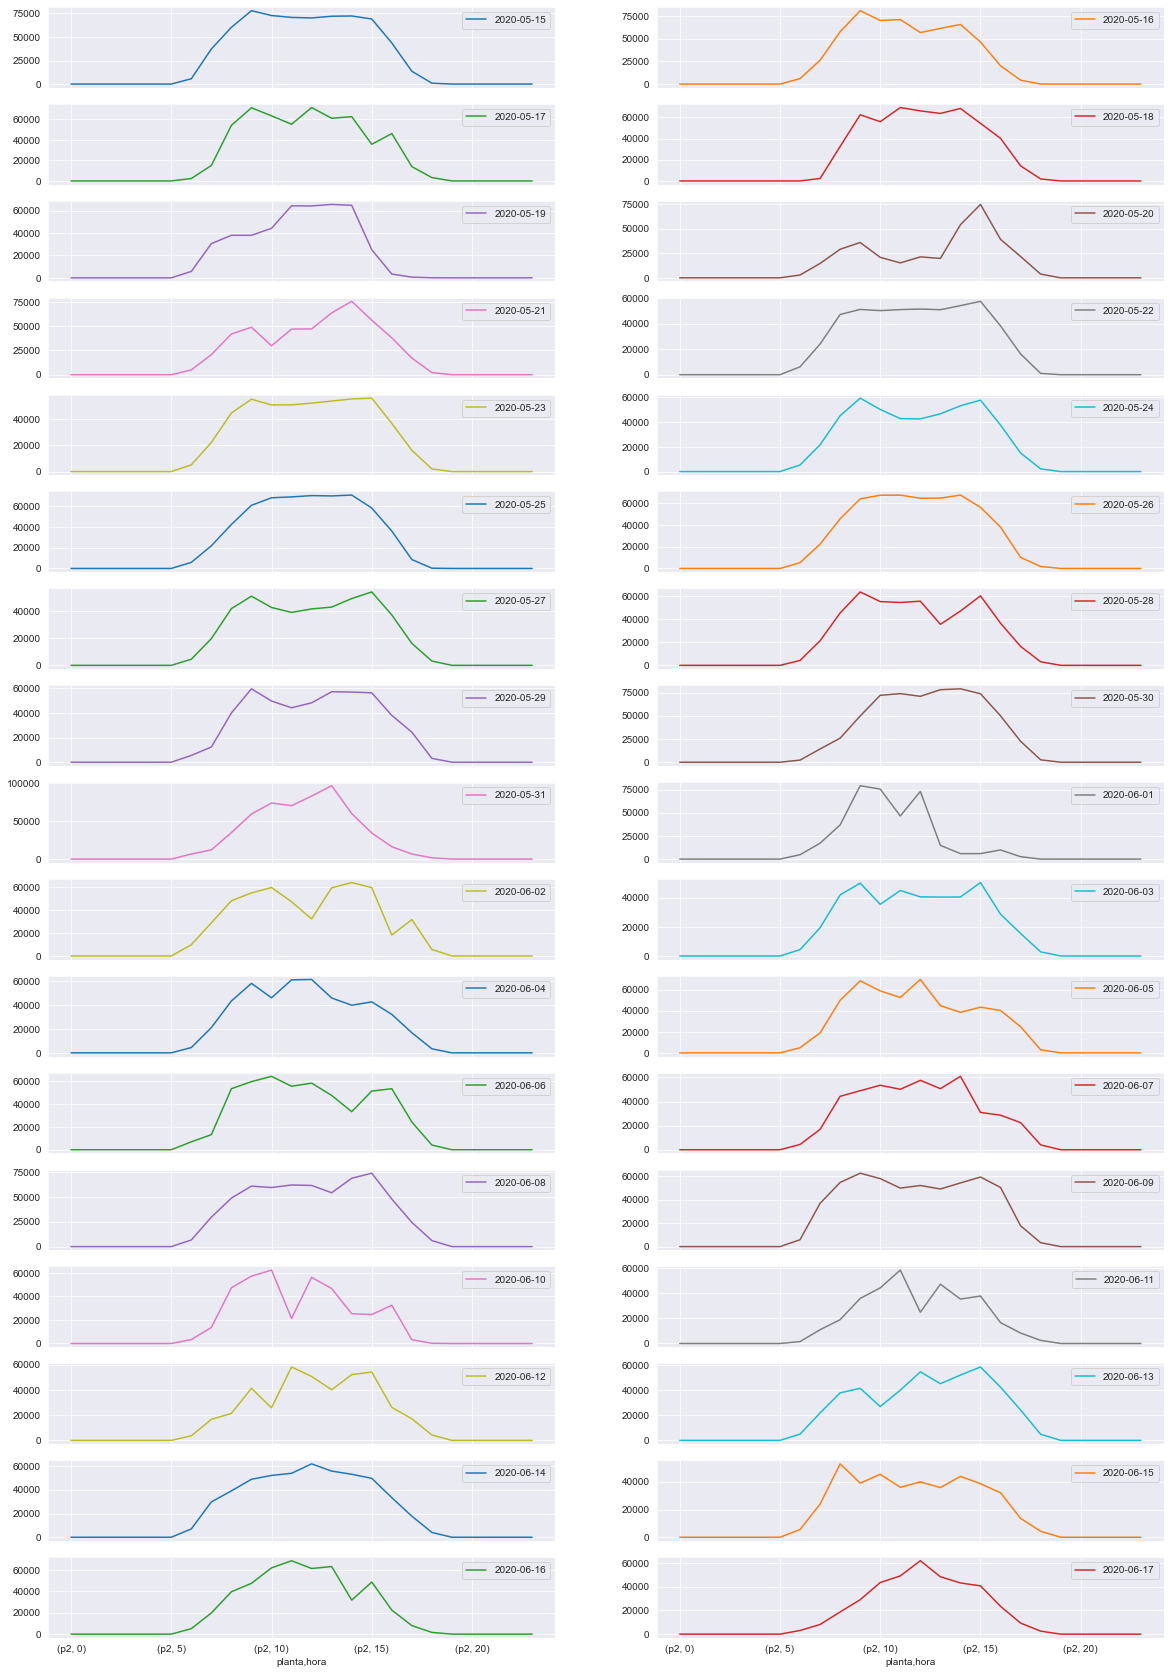

In [45]:
dc_constante_p2.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusiones:

* De nuevo el día 20 de Mayo aparece con un comportamiento singular.
* Los niveles de producción son constantes durante los días, pero siempre unas 10 veces por debajo de los nivels de la planta 1.

**INSIGHT #2:** Los niveles bajos de la planta 2 son constantes y presentan unas curvas diarias que parecen normales.

### ¿La conversión de DC a AC se genera correctamente?

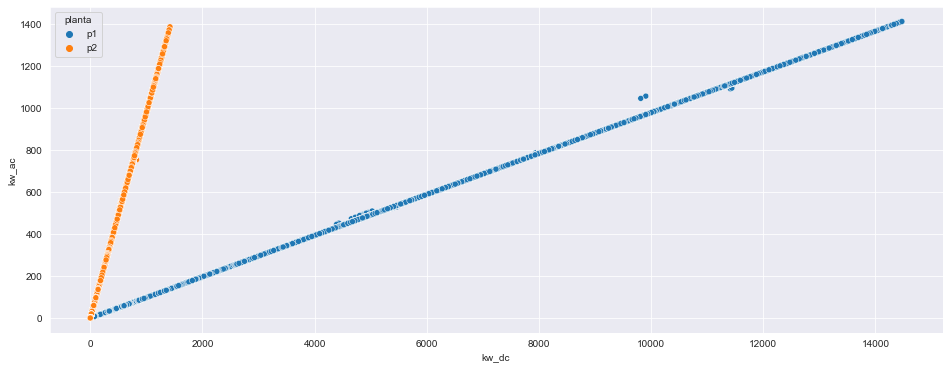

In [46]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = df, x = df.kw_dc, y = df.kw_ac, hue = df.planta);

De nuevo los patrones son muy claros: la planta 2 transforma la corriente de forma mucho más eficiente.

Se ampliará analizando la variable eficiencia creada previamente.

In [47]:
temp = df.groupby(['planta','hora'],as_index = False).eficiencia.mean()
temp

,planta,hora,eficiencia
0,p1,0,0.00
1,p1,1,0.00
2,p1,2,0.00
3,p1,3,0.00
4,p1,4,0.00
5,p1,5,0.00
6,p1,6,9.20
7,p1,7,9.80
8,p1,8,9.81
9,p1,9,9.78


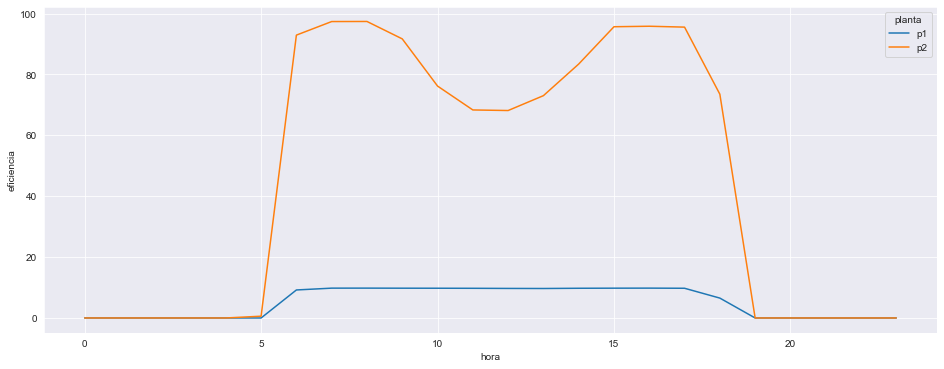

In [49]:
plt.figure(figsize=(16,6))
sns.lineplot(data=temp,x='hora',y='eficiencia',hue='planta');

**INSIGHT #3**

La planta 1 tiene una capacidad de transformar DC a AC bajísima, lo cual sugiere problemas con los inverters.

Otras conclusiones:

* Comprobar en detalle los inverters de la planta 1, a ver si son todos o hay algunos que sesgan la media.
* Revisar por qué la planta 2 pierde eficiencia durante las horas de más irradiación.

Comparación de la producción de DC con la de AC en la planta 2.

In [50]:
temp = df[['planta','hora','kw_dc','kw_ac']].melt(id_vars= ['planta','hora'])

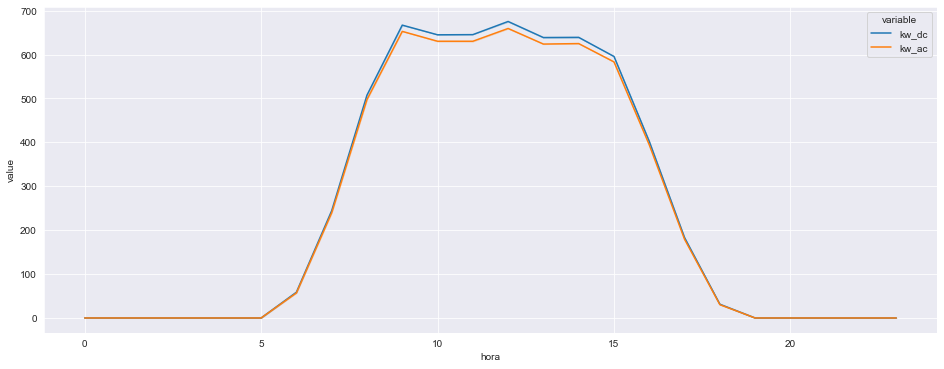

In [51]:
plt.figure(figsize = (16,6))
sns.lineplot(data = temp[temp.planta == 'p2'], x = 'hora', y = 'value', hue = 'variable', ci = False);

Se comprueba que efectivamente en las horas centrales hay pérdida de eficiencia. Pero no de forma tan significativa como el nivel de pérdida detectado en el análisis anterior.

Análisis de la distribución de la eficiencia en esas horas.

In [52]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p2']

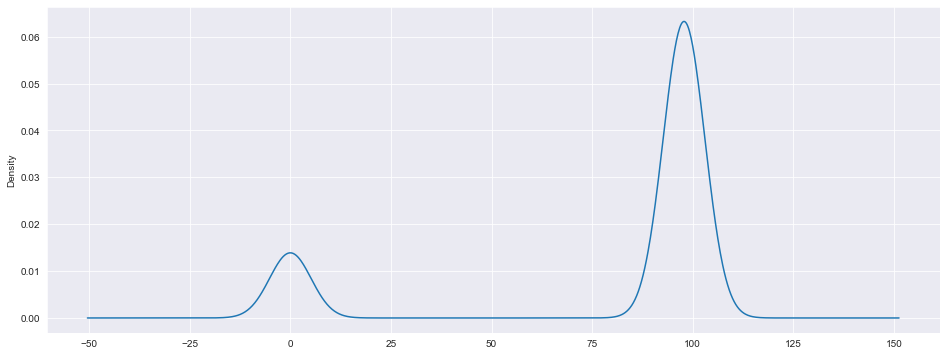

In [53]:
temp.eficiencia.plot.density(figsize=(16,6));

Hay un conjunto de datos con eficiencia cero, y es lo que genera el problema. ¿Pero cual es la causa de esa eficiencia cero?

Revisión de dichos casos.

In [54]:
temp[temp.kw_dc == 0]

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total,date
fecha,,,,,,,,,,,,,,,,
2020-05-15 09:45:00,p2,5,15,9,45,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,81aHJ1q11NBPMrL,0.00,0.00,0.00,1645.00,1215280381.00,2020-05-15
2020-05-15 09:45:00,p2,5,15,9,45,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,Et9kgGMDl729KT4,0.00,0.00,0.00,1541.00,1705791.00,2020-05-15
2020-05-15 09:45:00,p2,5,15,9,45,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,Quc1TzYxW2pYoWX,0.00,0.00,0.00,1324.00,329510409.00,2020-05-15
2020-05-15 09:45:00,p2,5,15,9,45,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,xoJJ8DcxJEcupym,0.00,0.00,0.00,1735.00,209145328.00,2020-05-15
2020-05-15 10:00:00,p2,5,15,10,0,iq8k7ZNt4Mwm3w0,0.83,31.89,46.13,81aHJ1q11NBPMrL,0.00,0.00,0.00,1645.00,1215280381.00,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16 14:30:00,p2,6,16,14,30,iq8k7ZNt4Mwm3w0,0.56,30.83,44.38,q49J1IKaHRwDQnt,0.00,0.00,0.00,0.00,34379.33,2020-06-16
2020-06-16 14:30:00,p2,6,16,14,30,iq8k7ZNt4Mwm3w0,0.56,30.83,44.38,rrq4fwE8jgrTyWY,0.00,0.00,0.00,0.00,8075096.33,2020-06-16
2020-06-16 14:30:00,p2,6,16,14,30,iq8k7ZNt4Mwm3w0,0.56,30.83,44.38,vOuJvMaM2sgwLmb,0.00,0.00,0.00,0.00,173022.79,2020-06-16


Parece que no es problema del inverter, si no de que en esos momentos no se ha generado DC.

Se establecerá la condición de que DC > 0 para comprobar ahí cual es la eficiencia.

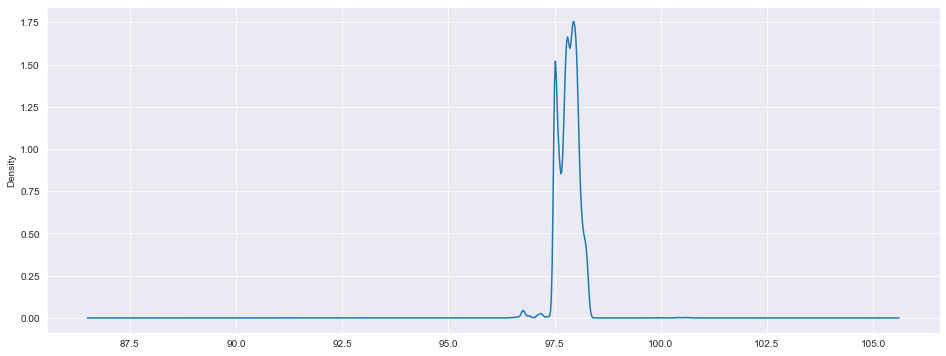

In [55]:
temp[temp.kw_dc > 0].eficiencia.plot.density(figsize=(16,6));

Efectivamente cuando hay DC la eficiencia es superior al 96%.

La pregunta entonces es ¿por qué no hay DC? ¿Hay algún patrón?

Se creará un indicador de DC = 0 para poder analizarlo.

In [56]:
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)

Variables numéricas.

In [57]:
temp.groupby('kw_dc_cero')[['irradiacion','t_ambiente','t_modulo']].mean()

,irradiacion,t_ambiente,t_modulo
kw_dc_cero,,,
0,0.59,30.48,44.32
1,0.80,32.48,52.03


En la temperatura ambiente no hay mucha diferencia, pero en la del módulo y en la irradiación sí.

¿Podría ser que si se calienta demasiado el módulo deje de generar DC?

Comparación de la temperatura del módulo con la generación de DC.

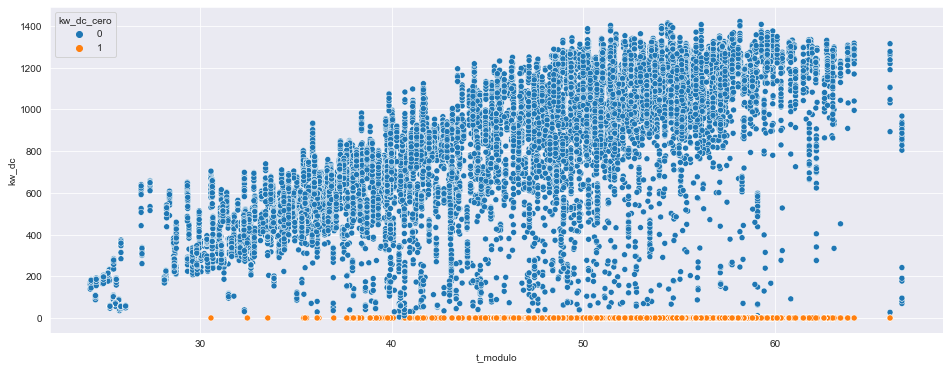

In [58]:
plt.figure(figsize=(16,6))
sns.scatterplot(data = temp, x = 't_modulo', y = 'kw_dc',hue = 'kw_dc_cero');

La hipótesis anterior no se confirma, ya que hay muchos casos de temperaturas altas donde se genera DC, y también de kw_dc igual a cero en casi todos los rangos de temperaturas.

Análisis de las variables categóricas, empezando por el inverter.

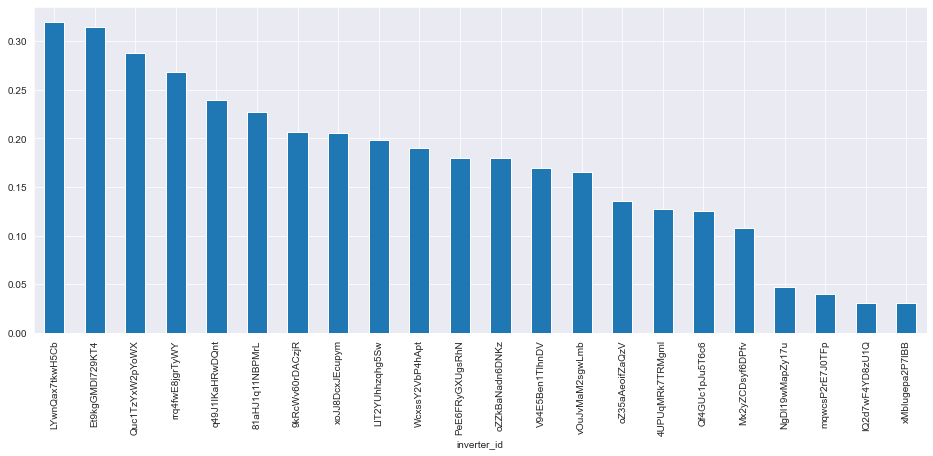

In [59]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar(figsize=(16,6));

Existe gran diferencia en el porcentaje de producción cero de DC por inverter.

Desde algunos que tienen menos del 5% hasta algunos que superan el 30%.

**INSIGHT #4:**: En la planta 2 existen varios inverters a los que no está llegando suficiente producción de DC, y por tanto cuyos módulos necesitan revisión.

Análisis de los inverters desde el punto de vista de la eficiencia media para ver si hay "buenos y malos".

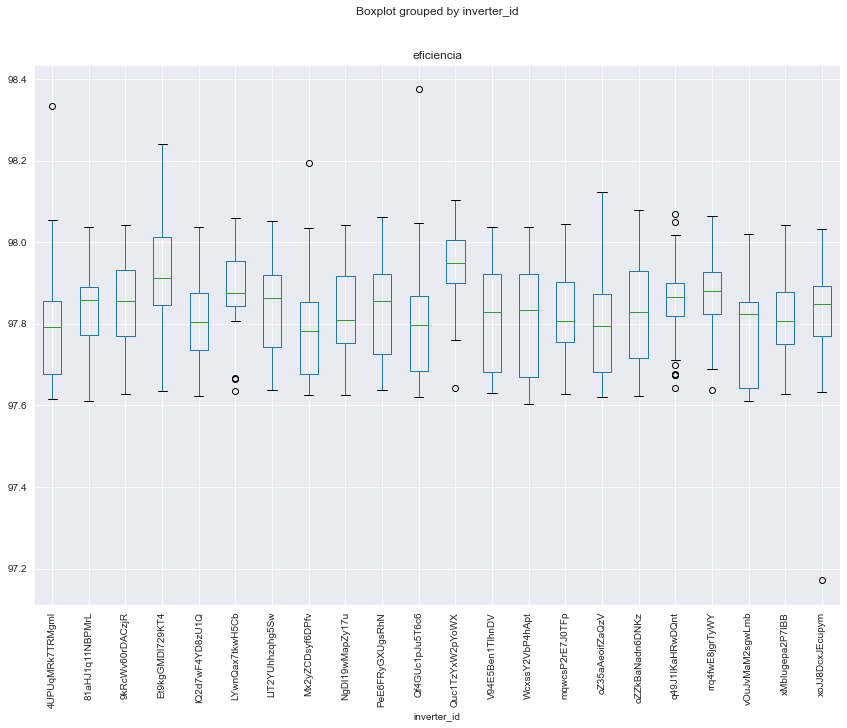

In [60]:
temp[temp.kw_dc > 0].groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

**INSIGHT #5:**: Una vez descontando el problema de la no generación de DC, los inverters de la planta 2 sí funcionan bien y hacen bien el trabajo de transformación a AC.

Para terminar de analizar la eficiencia de los inverters se visualizará su rendimiento en cada  uno de los días para ver si han posido existir problemas puntuales.

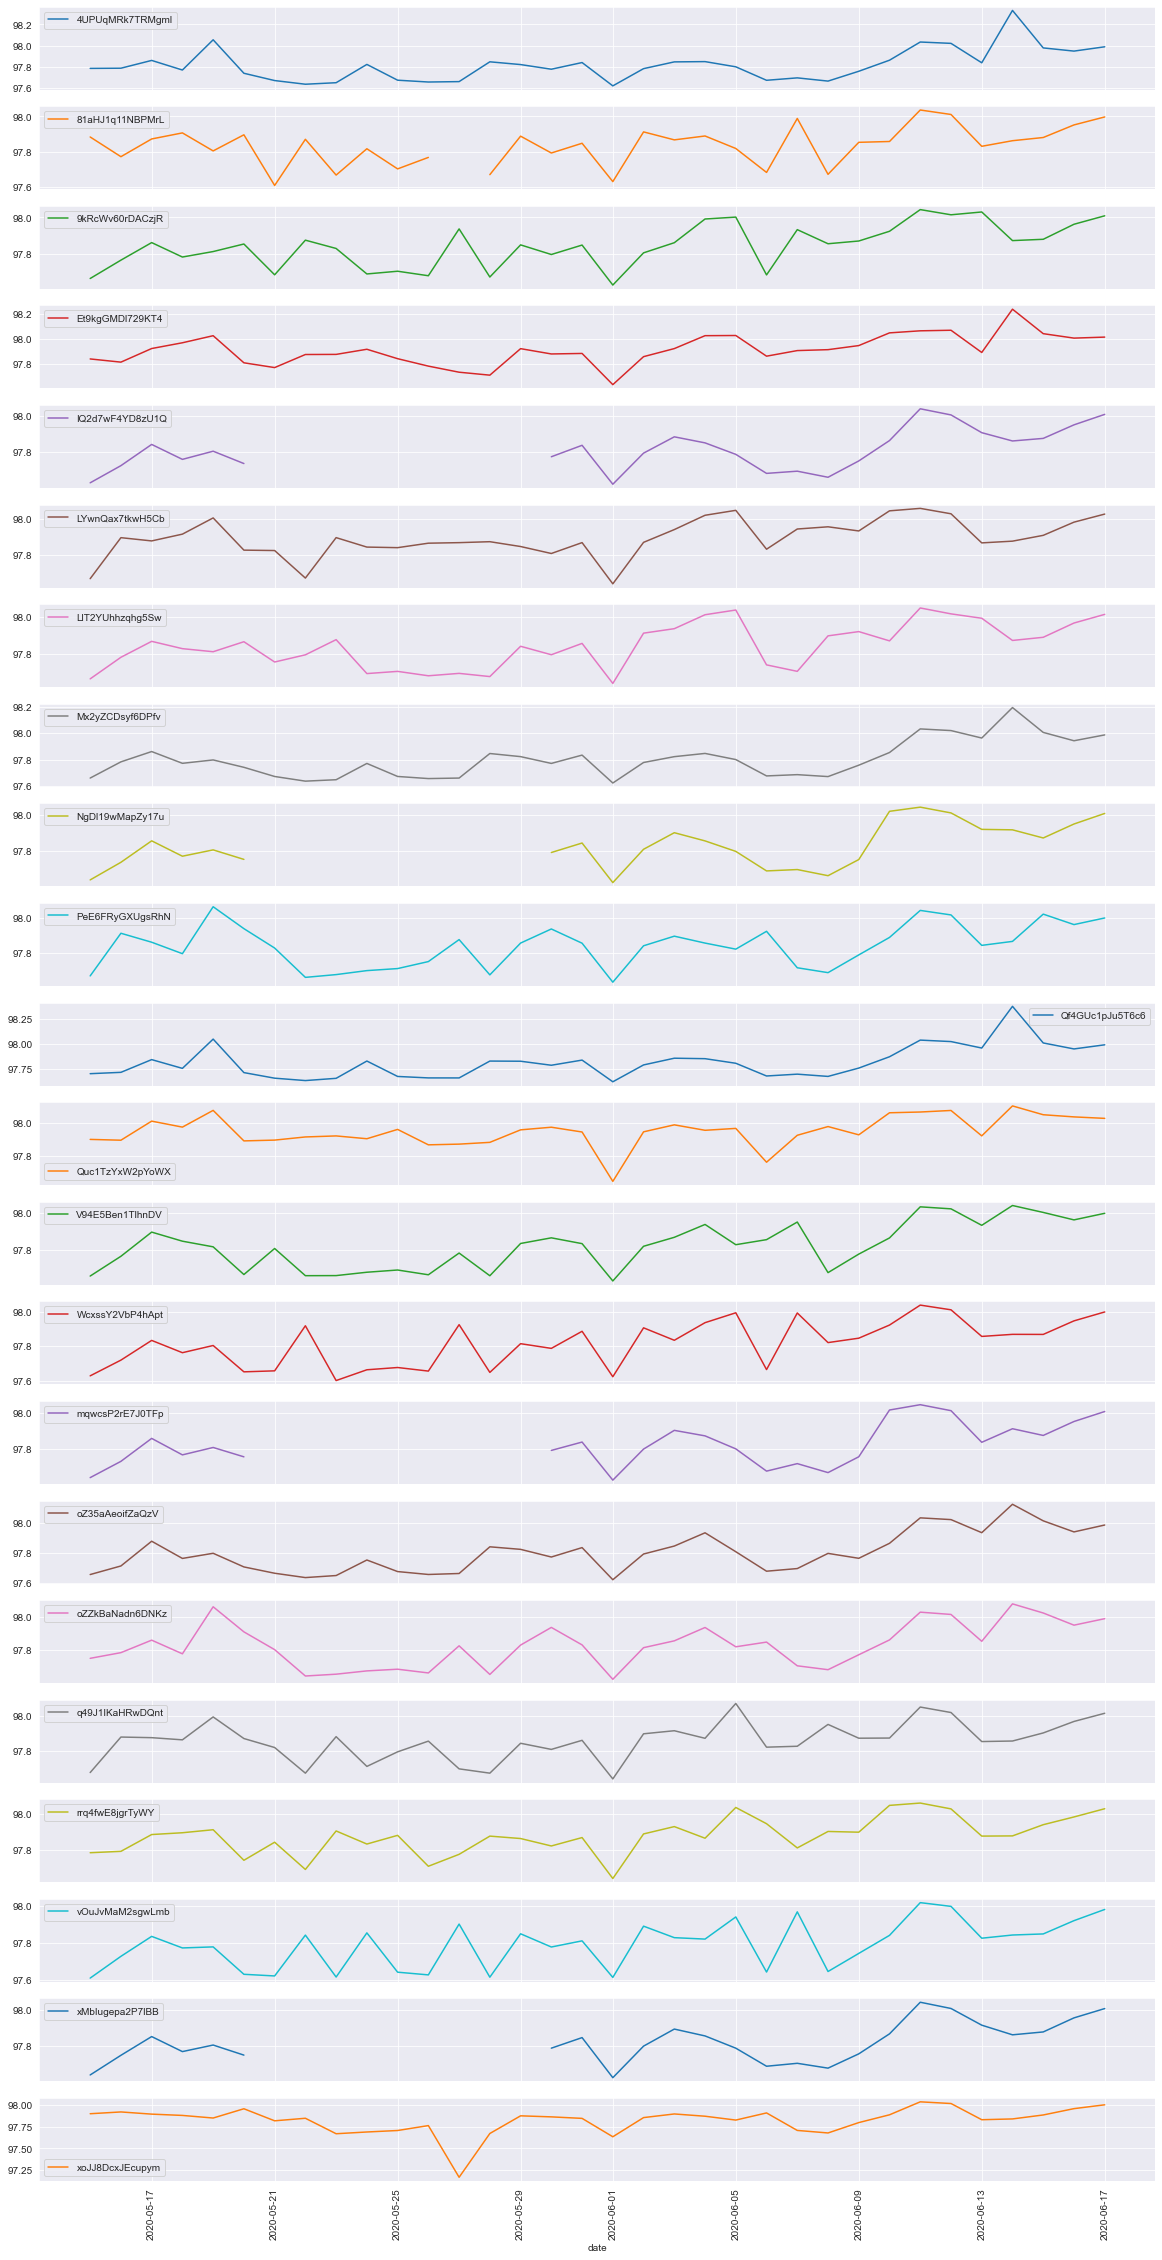

In [61]:
temp[temp.kw_dc > 0].groupby(['inverter_id','date']).eficiencia.mean().unstack(level = 0).plot(subplots = True, sharex=True, figsize=(20,40))
plt.xticks(rotation = 90);

Para tener un término de comparación se repetirán los análisis con la planta 1.

In [62]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p1']
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)

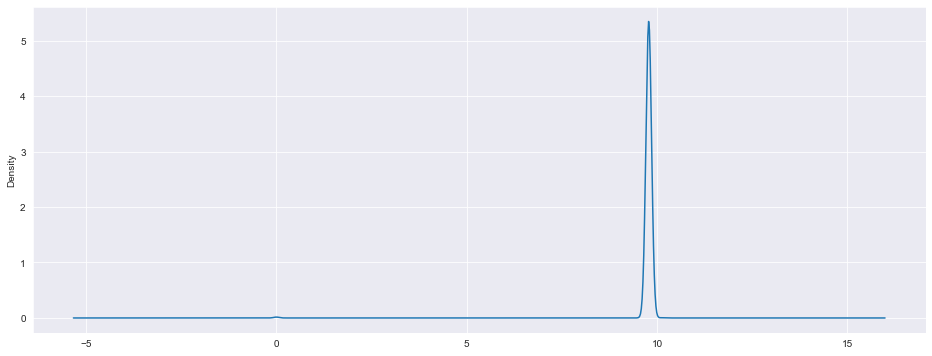

In [63]:
temp.eficiencia.plot.density(figsize=(16,6));

En esta planta todos los inverters tienen una eficiencia constante (aunque muy baja).

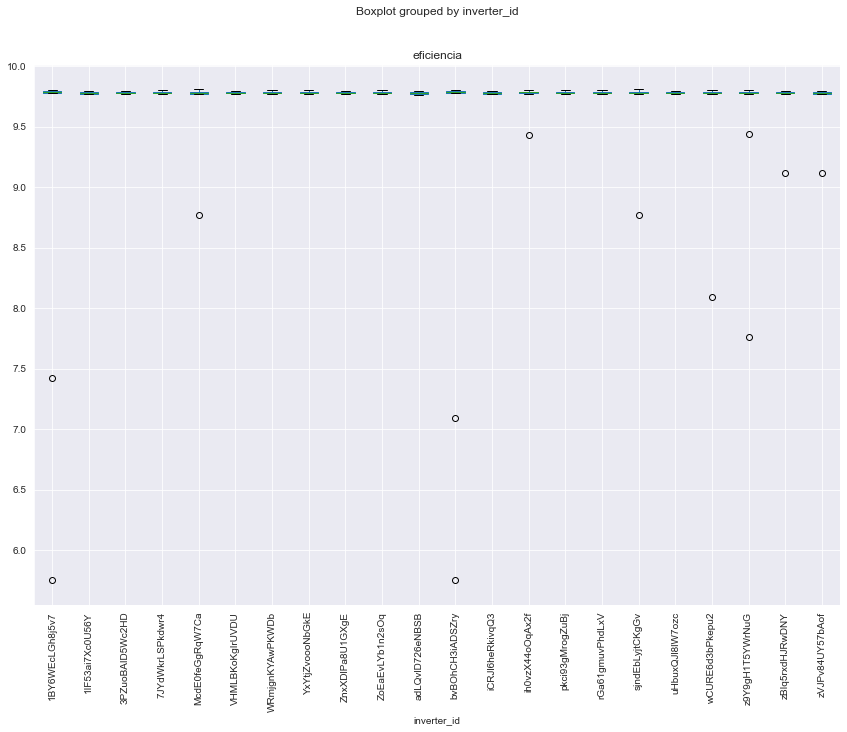

In [64]:
temp.groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

Salvo días puntuales en algunos inverters en el resto la eficiencia es constante.

Revisión de la eficiencia media diaria por cada inverter.

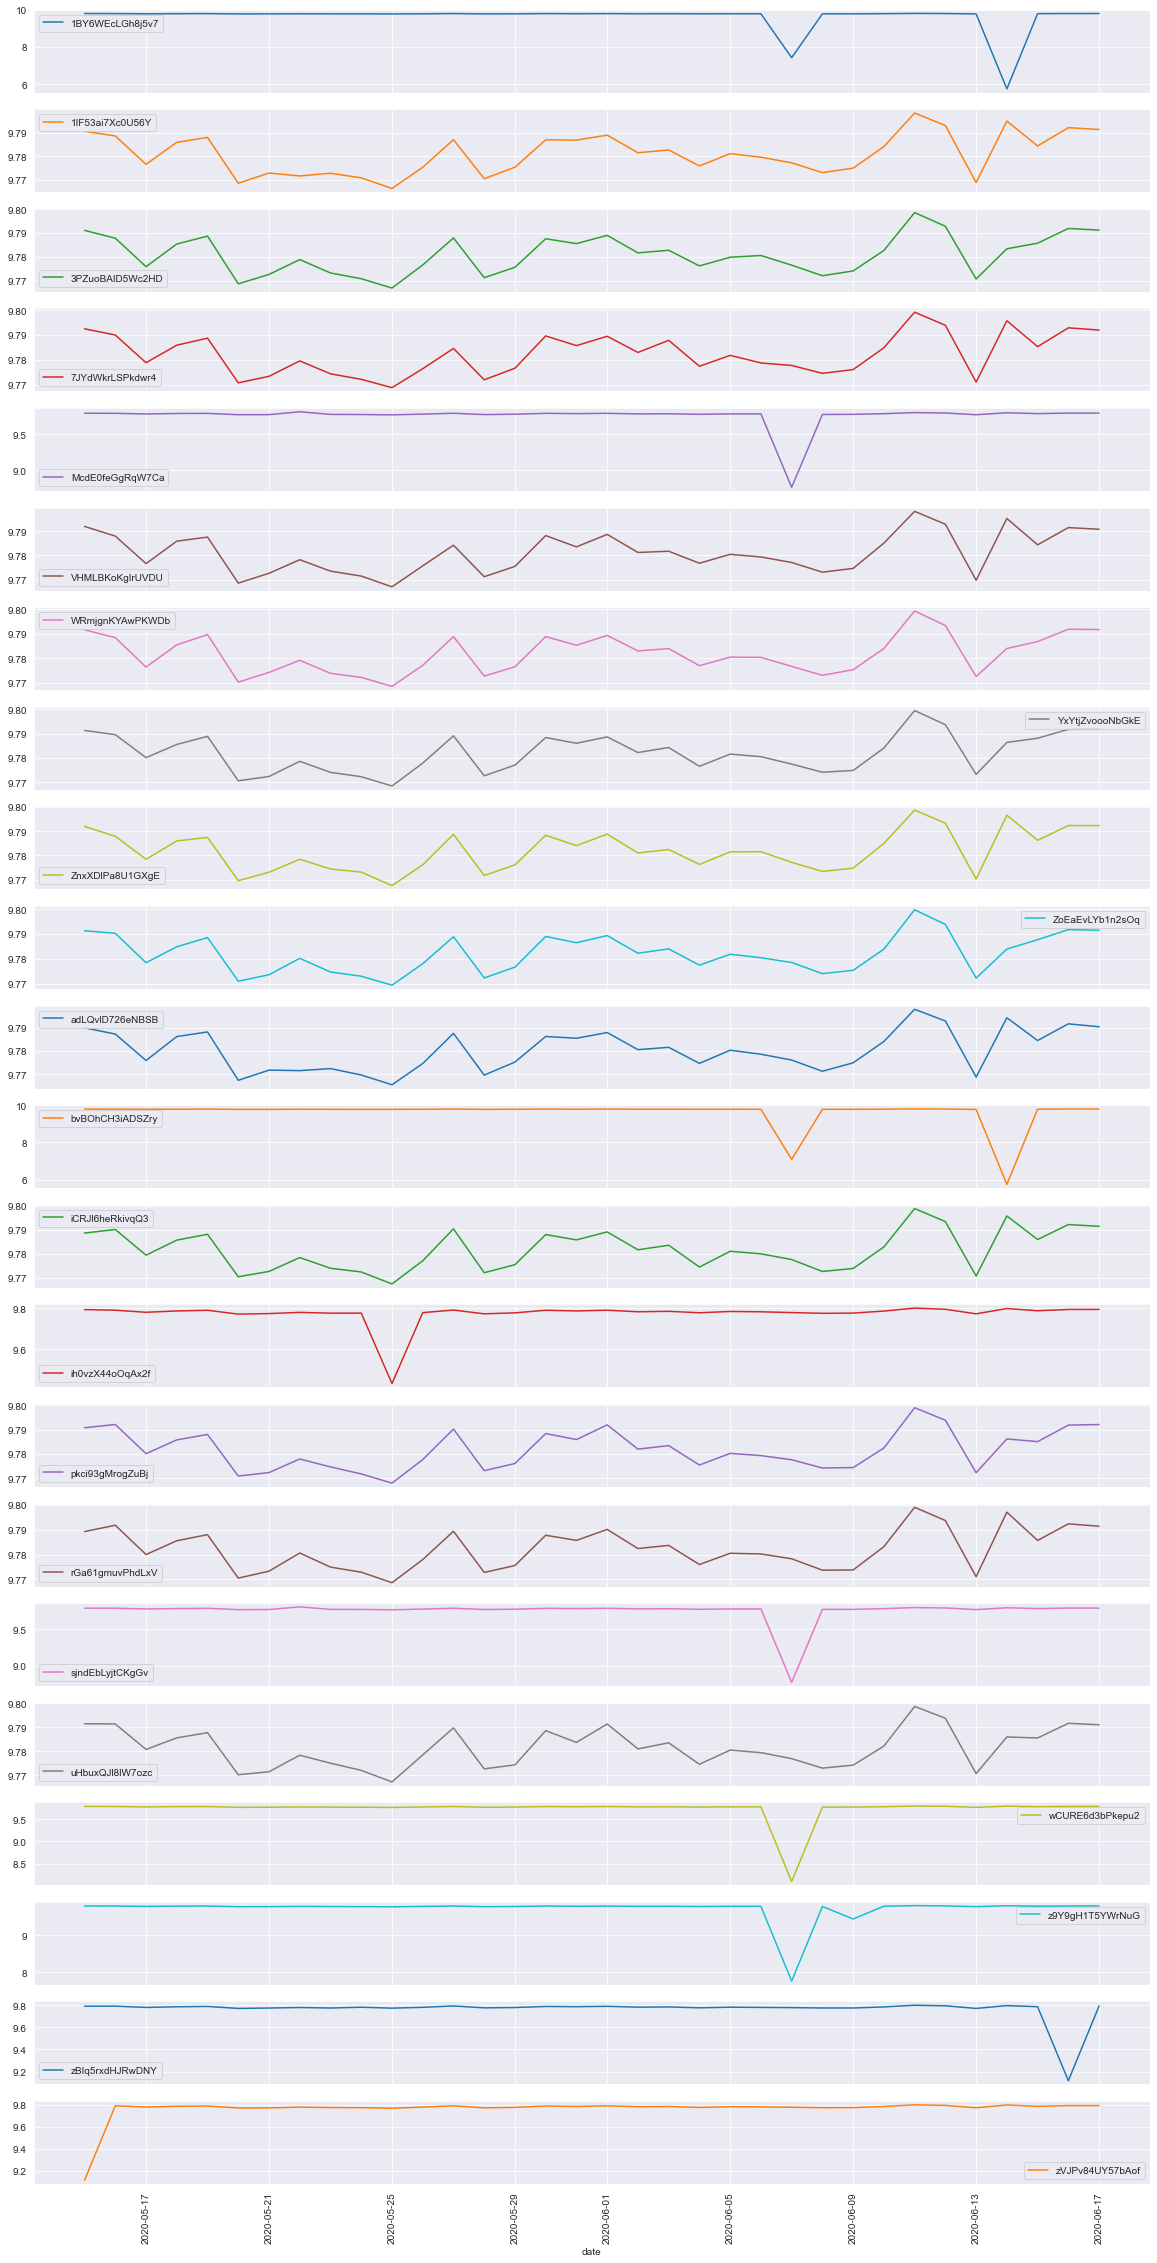

In [65]:
temp.groupby(['inverter_id','date']).eficiencia.mean().unstack(level = 0).plot(subplots = True, sharex=True, figsize=(20,40))
plt.xticks(rotation = 90);

En el análisis por inverter se comprueba de nuevo que todos los datos son constantes.

Comprobación de que entonces no hay fallos en la generación de DC.

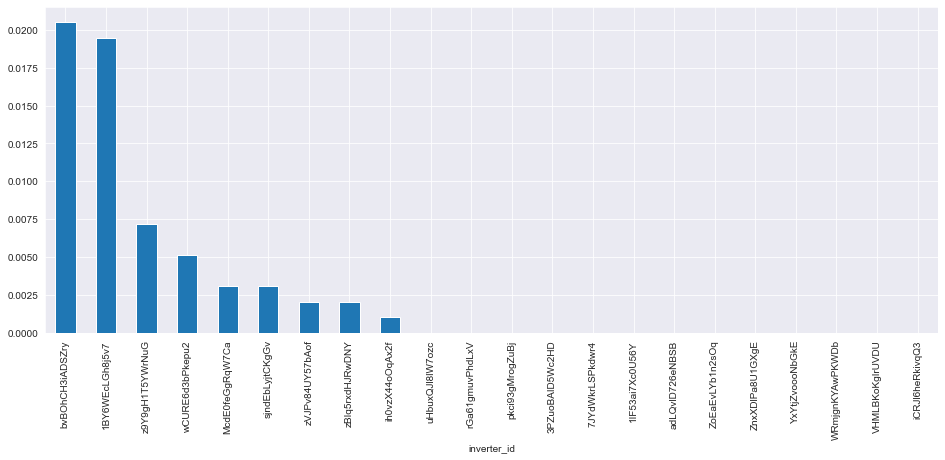

In [66]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar(figsize=(16,6));

Se detecta que, aunque hay algunos inverters que han tenido fallos su magnitud es inferior al 2% de las mediciones.

Por tanto la generación de DC en la planta 1 sí es correcta, y el fallo está en la transformación de DC a AC.

## CONCLUSIONES

Tras un ananálisis de los datos puede concluirse que:
    
* Existen graves problemas de calidad de datos. Se debería revisar en qué parte de la cadena se generan estos problemas, incluyendo los medidores de las plantas.
* El hecho de que la generación en DC sea unas 10 veces superior en la planta 1 que en la 2, sumado al hecho de que la eficiencia en la planta 1 esté sobre el 10% nos lleva a pensar que el dato de generación de DC en la planta 1 puede estar artificialmente escalado por algún motivo.
* Pero de momento a falta de comprobación vamos a asumir que los datos son correctos.
* La dos plantas han recibido altas cantidades de irradiación, no hemos localizado ningún problema en esta fase.
* Aunque la temperatura ambiente es superior en la planta 2 y sus módulos se calientan más que los de la planta 1 esto no parece tener un impacto significativo.
* La generación de DC de la planta 1 funciona bien, los módulos parecen llevar DC a los inverters.
* La generación de DC de la planta 2 NO funciona bien, algunos módulos llevan muy poco DC a los inverters incluso en las horas de mayor irradiación.
* La transformación de DC a AC de la planta 1 NO funciona bien, solo se transforma en torno al 10%, eso sí, de forma constante. Y esta baja eficiencia no es debida a momentos de no recepción de DC ni se concentra en inverters concretos, si no que parece más estructural (de nuevo tener en cuenta que podría deberse a un problema de calidad de datos en kw_dc de la planta 1.
* La transformación de DC a AC de la planta 2 funciona bien, ya que una vez eliminados los períodos de generación cero de DC el resto tienen una eficiencia superior al 97%.

Recomendaciones:

* Revisar la captación de datos y su fiabilidad.
* Revisión de mantenimiento en los módulos de los inverters  de la planta 2 en los que hay muchos momentos de generación cero de DC.
* Revisión de mantenimiento de los inverters de la Planta 1.